In [32]:
import pathlib, os
from random import randint, random, choice
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from tqdm import tqdm

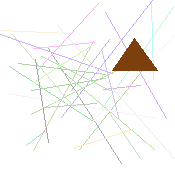

In [58]:
def cor(clara=True):
    (min_, max_) = (150, 255) if clara else (0, 150)
    return (randint(min_, max_), randint(min_, max_), randint(min_, max_))

def borda_centro(x0, y0, x1, y1):
    w = (x1 - x0)
    h = (y1 - y0)
    xc = x0 + w/2
    yc = y0 + h/2
    return xc, yc, w, h
    
def create_image(img_dir, n):

    min_img_, max_img_ = 150, 250
    min_, max_ = 30, 60

    img_w, img_h = randint(min_img_, max_img_), randint(min_img_, max_img_)
    img_pil = Image.new('RGB', (img_w, img_h), color='white')
    draw = ImageDraw.Draw(img_pil)

    w, h = randint(min_, max_), randint(min_, max_)
    x0, y0 = randint(10, img_w - w - 10), randint(10, img_h - h - 10)
    x1, y1 = x0 + w, y0 + h

    for _ in range(30):
        lx0, ly0, lx1, ly1 = randint(0, img_w), randint(0, img_h), randint(0, img_w), randint(0, img_h)
        draw.line([lx0, ly0, lx1, ly1], width=1, fill=cor(True))

    # anotação de bordas.
    tipo = ['vazio', 'triangulo', 'circulo']
    classe = choice(tipo)
    if (classe == 'triangulo'): # triangulo
        p1, p2, p3 = (x0, y1), (x1, y1), (x0+(x1-x0)/2, y0)
        draw.polygon([p1, p2, p3], fill=cor(False))
    elif (classe == 'circulo'):
        classe = 'c'
        draw.ellipse([x0, y0, x1, y1], fill=cor(False))
    else:
        x0, y0, x1, y1 = 0, 0, 0, 0
        pass
        
    xc, yc, w, h = borda_centro(x0, y0, x1, y1)
    anotacao = [f'{img_dir}/img_{n:05}.jpg', img_w, img_h, xc/img_w, yc/img_h, w/img_w, h/img_h, classe]

    if (False):
        draw.rectangle([x0, y0, x1, y1], fill=None, outline='red', width=1)
        
        draw.line((xc, yc-h/2, xc, yc+h/2), fill='black', width=1) # marca linha vertical
        draw.line((xc-w/2, yc, xc+w/2, yc), fill='black', width=1) # marca linha horizontal

    return img_pil, anotacao

img_pil, anotacao = create_image('./imgs', 9)
img_pil

In [54]:
anotacoes = []
for k in tqdm(range(5_000)):
    img_pil, anotacao = create_image('./imgs', k)
    nome = anotacao[0]
    img_pil.save(nome)
    anotacoes.append(anotacao)

anotacoes = np.array(anotacoes)
df = pd.DataFrame(anotacoes, columns=['img_path', 'img_w', 'img_h', 'xc/img_w', 'yc/img_h', 'w/img_w', 'h/img_h', 'classe'])
df.to_csv('annotations.csv', index=False)

100%|██████████| 5000/5000 [00:20<00:00, 249.67it/s]


In [55]:
df.classe.value_counts()

c            1691
triangulo    1690
vazio        1619
Name: classe, dtype: int64

triangulo


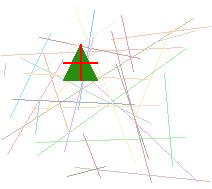

In [69]:
df = pd.read_csv('annotations.csv')
amostra = df.sample(1).values[0]
img_path = amostra[0]
img_pil = Image.open(img_path)
draw = ImageDraw.Draw(img_pil)
imgw, imgh, xc, yc, w, h, classe = amostra[1:]
xc, w = xc*imgw, w*imgw
yc, h = yc*imgh, h*imgh
draw.line([xc, yc-h/2, xc, yc+h/2], fill='red', width=2)
draw.line([xc-w/2, yc, xc+w/2, yc], fill='red', width=2)
print (classe)
img_pil